In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
data = pd.read_csv('ENJOYSPORT.csv')
data.head()


,Sky,AirTemp,Humidity,Wind,Water,Forecast,EnjoySport
0,Sunny,Warm,Normal,Strong,Warm,Same,1
1,Sunny,Warm,High,Strong,Warm,Same,1
2,Rainy,Cold,High,Strong,Warm,Change,0
3,Sunny,Warm,High,Strong,Cool,Change,1


In [ ]:
X = data.iloc[:,:-1]
print("ENJOYSPORT",X.head())


ENJOYSPORT      Sky AirTemp Humidity    Wind Water Forecast
0  Sunny    Warm   Normal  Strong  Warm     Same
1  Sunny    Warm     High  Strong  Warm     Same
2  Rainy    Cold     High  Strong  Warm   Change
3  Sunny    Warm     High  Strong  Cool   Change


In [ ]:
y = data.iloc[:,-1]
print("ENJOYSPORT",y.head())


ENJOYSPORT 0    1
1    1
2    0
3    1
Name: EnjoySport, dtype: int64


In [ ]:
le_Sky = LabelEncoder()
X.Sky = le_Sky.fit_transform(X.Sky)
le_AirTemp = LabelEncoder()
X.AirTemp = le_AirTemp.fit_transform(X.AirTemp)
le_Humidity = LabelEncoder()
X.Humidity = le_Humidity.fit_transform(X.Humidity)
le_Wind = LabelEncoder()
X.Wind = le_Wind.fit_transform(X.Wind)
le_Water = LabelEncoder()
X.Water = le_Water.fit_transform(X.Water)
le_Forecast = LabelEncoder()
X.Forecast = le_Forecast.fit_transform(X.Forecast)
print("\nNow the Train data is :\n",X.head())



Now the Train data is :
    Sky  AirTemp  Humidity  Wind  Water  Forecast
0    1        1         1     0      1         1
1    1        1         0     0      1         1
2    0        0         0     0      1         0
3    1        1         0     0      0         0


In [ ]:
le_ENJOYSPORT = LabelEncoder()
y = le_ENJOYSPORT.fit_transform(y)
print("\nNow the Train output is\n",y)



Now the Train output is
 [1 1 0 1]


In [ ]:
print("**************************************************Naive Bayes***********************************************")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)
classifier = GaussianNB()
classifier.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
print("Accuracy is:",accuracy_score(classifier.predict(X_test),y_test))
print('Accuracy: {:.2f}%'.format(accuracy_score(classifier.predict(X_test),y_test)))


**************************************************Naive Bayes***********************************************
Accuracy is: 1.0
Accuracy: 1.00%


In [14]:
print("**************************************************Random Forest Regressor***********************************************")
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
X = data.drop('EnjoySport', axis=1)
y = data['EnjoySport']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error is:", mse)
print("R-squared: {:.2f}".format(r2))


**************************************************Random Forest Regressor***********************************************
Mean Squared Error is: 1.0
R-squared: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

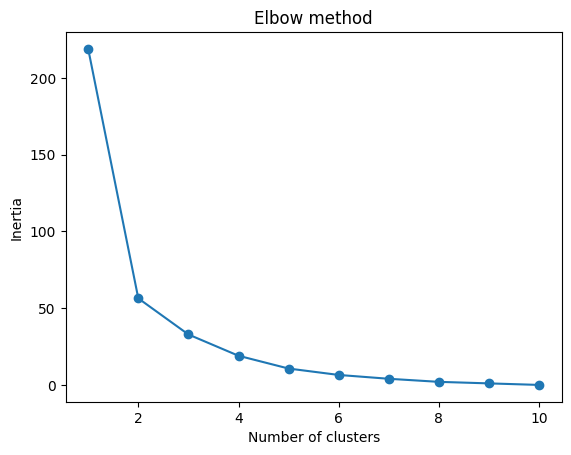

In [17]:
from sklearn.cluster import KMeans
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
data = list(zip(x, y))
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

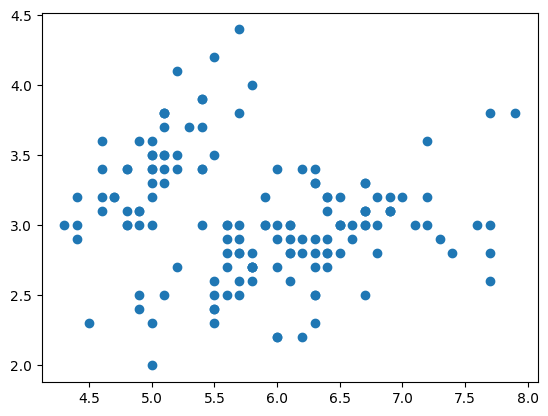

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn import datasets
from sklearn.mixture import GaussianMixture
iris = datasets.load_iris()
X = iris.data[:, :2]
d = pd.DataFrame(X)
plt.scatter(d[0], d[1])
plt.show()


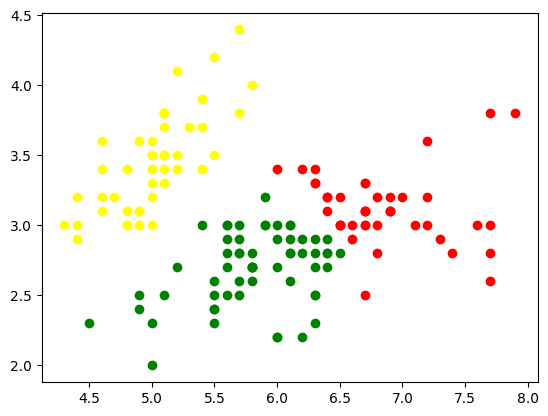

In [19]:
gmm = GaussianMixture(n_components = 3)
gmm.fit(d)
labels = gmm.predict(d)
d['labels']= labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')
plt.show()


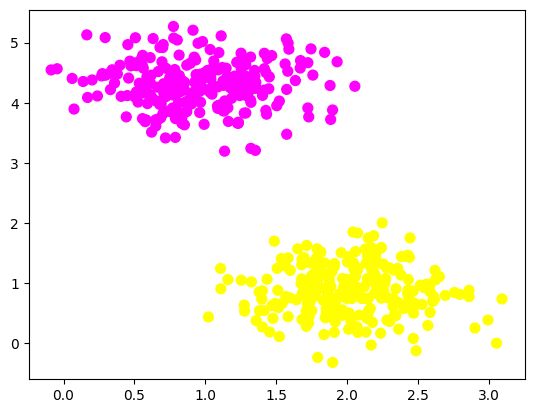

In [20]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=500, centers=2,
				random_state=0, cluster_std=0.40)
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring');
plt.show()
